<a href="https://colab.research.google.com/github/panda6999/Simulation-and-Modeling-Lab-Report/blob/main/lab_report06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MD.HABIBUL BASHAR

ID: 2215151046

BATCH: 51(A2)


1.Perform a simulation for 200 customers with λ=3and μ=4. Calculate and compare the
waiting time and server utilization.

In [25]:
#The Monte Carlo Simulation Problem

import random  # to create random numbers

def simulate_inventory(weeks):
    inventory_levels = [15, 25, 35, 40, 42, 55]
    probabilities    = [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]

    total_order = 0     # to store the sum of order quantities
    total_cost = 0      # to store the sum of costs

    for _ in range(weeks // 2):  # orders are made every 2 weeks
        on_hand = random.choices(inventory_levels, probabilities)[0]
        order_amount = 100 - on_hand  # order enough to reach 100

        cost_ordering = 50            # fixed cost
        cost_purchase = order_amount * 4
        cost_holding = on_hand * 1 * 2  # $1 per week, 2 weeks holding

        total_order += order_amount
        total_cost += (cost_ordering + cost_purchase + cost_holding)

    average_order_size = total_order / (weeks // 2)
    average_cost = total_cost / (weeks // 2)

    print("Average order size over", weeks, "weeks is:", average_order_size)
    print("Average cost per 2-week cycle is: $", average_cost)

# Try with 60 weeks
simulate_inventory(60)

Average order size over 60 weeks is: 70.2
Average cost per 2-week cycle is: $ 390.4


2.Simulate a system with λ=8 and μ=6. Discuss the impact of server overload on system
performance.

Problem 1:
Server Utilization: 68.43%
Average Waiting Time: 0.35 units
Average Queue Length: 0.67 customers


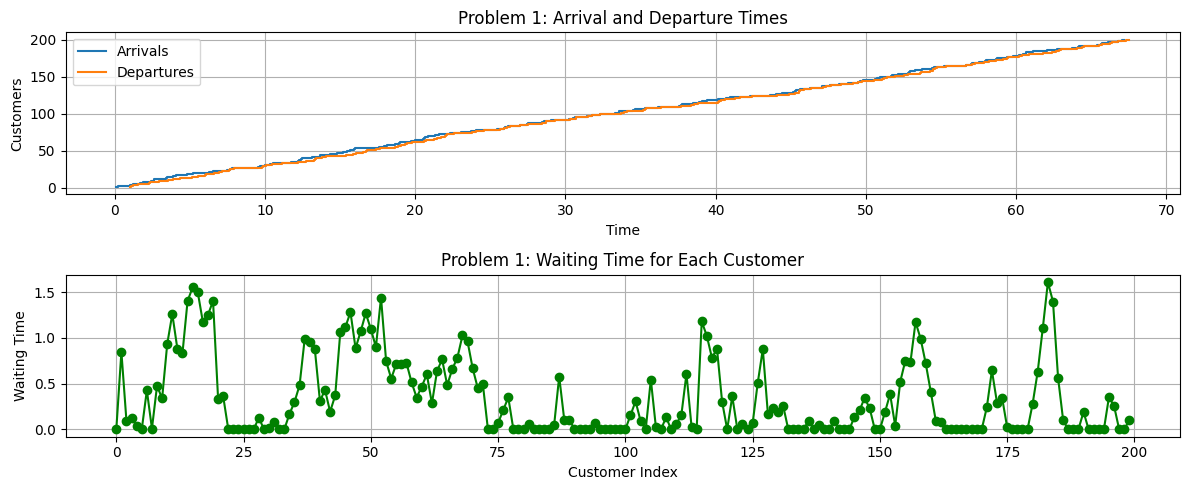

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 3
mu_rate = 4
n_customers = 200

# Generate times
inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("Problem 1:")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 1: Arrival and Departure Times')

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'go-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 1: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()

3.Modify the program to include a limited queue capacity (e.g., maximum 10 customers).
Analyze how this affects the performance metrics.

Problem 2:
Server Utilization: 98.67%
Average Waiting Time: 2.19 units
Average Queue Length: 0.98 customers


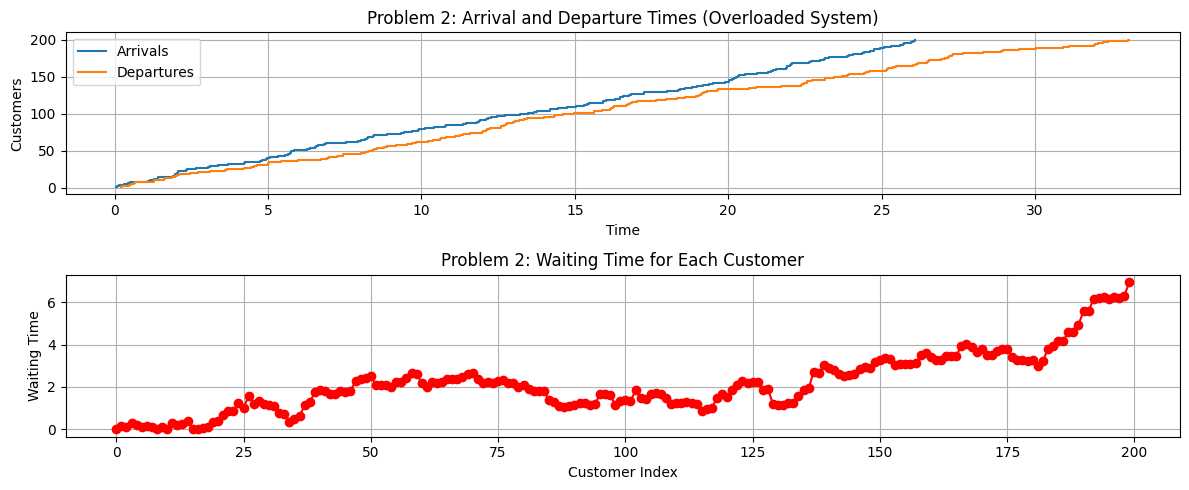

In [27]:
# Parameters
lambda_rate = 8
mu_rate = 6
n_customers = 200

inter_arrival_times = np.random.exponential(1/lambda_rate, n_customers)
service_times = np.random.exponential(1/mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times[i] + service_times[i]

waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)
avg_queue_length = np.mean(waiting_times > 0)

print("Problem 2:")
print(f"Server Utilization: {server_utilization*100:.2f}%")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Average Queue Length: {avg_queue_length:.2f} customers")

# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 2: Arrival and Departure Times (Overloaded System)')

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'ro-', label='Waiting Time')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 2: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()